## Summer Olympics Data Analysis Assignment

### 1. In how many cities Summer Olympics is held so far?

Importing the necessary library `pandas` which we would be using extensively throughout this data analysis project. Then we utilise the `read_csv` function to read in the csv file stored in our local system and then we use the `head` function to display the top 5 rows.

In [1]:
import pandas as pd

df = pd.read_csv('Summer.csv')
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [2]:
df['City']

0        Athens
1        Athens
2        Athens
3        Athens
4        Athens
          ...  
31160    London
31161    London
31162    London
31163    London
31164    London
Name: City, Length: 31165, dtype: object

To know the no of cities present in our dataset we can use the `unique` function as show below:

In [3]:
pd.unique(df['City'])

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [6]:
len(pd.unique(df['City']))

22

#### Answer: 22

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

Since for our analysis we are only concerned with rows where there are *Gold* medals in sports, we can filter such rows by the use of boolean filtering technique as shown below

In [7]:
df.loc[df['Medal'] == 'Gold', ['Sport','Medal']]

,Sport,Medal
0,Aquatics,Gold
3,Aquatics,Gold
6,Aquatics,Gold
9,Aquatics,Gold
13,Athletics,Gold
...,...,...
31145,Wrestling,Gold
31149,Wrestling,Gold
31153,Wrestling,Gold
31157,Wrestling,Gold


To analyse at a sport level we use `groupby` and take the count of gold medals for each sport.

In [8]:
df.loc[df['Medal'] == 'Gold', ['Sport','Medal']].groupby(['Sport']).count().reset_index()

,Sport,Medal
0,Aquatics,1421
1,Archery,126
2,Athletics,1215
3,Badminton,46
4,Baseball,111
5,Basketball,342
6,Basque Pelota,2
7,Boxing,239
8,Canoe,27
9,Canoe / Kayak,334


Then we sort the sports by number of gold medals received in descending order as required for our analysis.

In [9]:
gold_per_sport = df.loc[df['Medal'] == 'Gold', ['Sport','Medal']].groupby(['Sport']).count().reset_index().sort_values(by=['Medal'], ascending=False)
gold_per_sport

,Sport,Medal
0,Aquatics,1421
2,Athletics,1215
28,Rowing,890
17,Gymnastics,820
14,Fencing,552
15,Football,503
19,Hockey,486
30,Sailing,412
42,Wrestling,391
31,Shooting,384


Since we need to look at only the top 5 rows, we can filter them out using the `head` function

In [11]:
gold_per_sport_plot = gold_per_sport.head()
gold_per_sport_plot

,Sport,Medal
0,Aquatics,1421
2,Athletics,1215
28,Rowing,890
17,Gymnastics,820
14,Fencing,552


We have used the `seaborn` library for plotting purposes.

[Text(0.5, 0, 'Sport'), Text(0, 0.5, 'Gold Medals')]

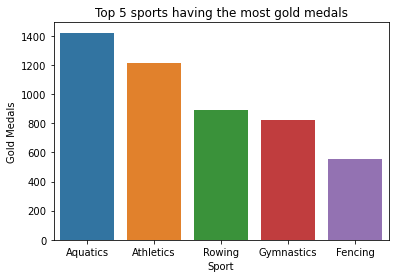

In [12]:
import seaborn as sns

plot = sns.barplot(x='Sport', y='Medal', data=gold_per_sport_plot)
plot.set_title("Top 5 sports having the most gold medals")
plot.set(xlabel='Sport', ylabel='Gold Medals')

### 3. Which sport is having most number of medals so far? (Top 5)

Since for our analysis we only require the `Sport` and `Medal` column, we have filtered our dataset below.

In [13]:
df.loc[:, ['Sport','Medal']]

,Sport,Medal
0,Aquatics,Gold
1,Aquatics,Silver
2,Aquatics,Bronze
3,Aquatics,Gold
4,Aquatics,Silver
...,...,...
31160,Wrestling,Bronze
31161,Wrestling,Gold
31162,Wrestling,Silver
31163,Wrestling,Bronze


To analyse at a sport level we use `groupby` and take the count of medals for each sport.

In [15]:
df.loc[:, ['Sport','Medal']].groupby(['Sport']).count().reset_index()

,Sport,Medal
0,Aquatics,4170
1,Archery,329
2,Athletics,3638
3,Badminton,144
4,Baseball,335
5,Basketball,1012
6,Basque Pelota,4
7,Boxing,894
8,Canoe,81
9,Canoe / Kayak,1002


Then we sort the sports by number of medals received in descending order as required for our analysis.

In [16]:
medals_per_sport = df.loc[:, ['Sport','Medal']].groupby(['Sport']).count().reset_index().sort_values(by=['Medal'], ascending=False)
medals_per_sport

,Sport,Medal
0,Aquatics,4170
2,Athletics,3638
28,Rowing,2667
17,Gymnastics,2307
14,Fencing,1613
15,Football,1497
19,Hockey,1422
42,Wrestling,1212
31,Shooting,1150
30,Sailing,1109


Since we need to look at only the top 5 rows, we can filter them out using the `head` function

In [18]:
medals_per_sport_plot = medals_per_sport.head()
medals_per_sport_plot

,Sport,Medal
0,Aquatics,4170
2,Athletics,3638
28,Rowing,2667
17,Gymnastics,2307
14,Fencing,1613


We have used the `seaborn` library for plotting purposes.

[Text(0.5, 0, 'Sport'), Text(0, 0.5, 'Medals')]

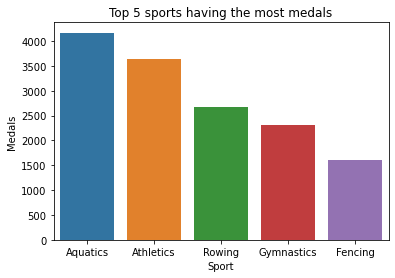

In [19]:
plot = sns.barplot(x='Sport', y='Medal', data=medals_per_sport_plot)
plot.set_title("Top 5 sports having the most medals")
plot.set(xlabel='Sport', ylabel='Medals')

### 4. Which player has won most number of medals? (Top 5)

Since for our analysis we only require the `Athlete` and `Medal` column, we have filtered our dataset below.

In [20]:
df.loc[:, ['Athlete','Medal']]

,Athlete,Medal
0,"HAJOS, Alfred",Gold
1,"HERSCHMANN, Otto",Silver
2,"DRIVAS, Dimitrios",Bronze
3,"MALOKINIS, Ioannis",Gold
4,"CHASAPIS, Spiridon",Silver
...,...,...
31160,"JANIKOWSKI, Damian",Bronze
31161,"REZAEI, Ghasem Gholamreza",Gold
31162,"TOTROV, Rustam",Silver
31163,"ALEKSANYAN, Artur",Bronze


To analyse at an athlete level we use `groupby` and take the count of medals for each sport.

In [21]:
df.loc[:, ['Athlete','Medal']].groupby(['Athlete']).count().reset_index()

,Athlete,Medal
0,"AABYE, Edgar",1
1,"AALTONEN, Arvo Ossian",2
2,"AALTONEN, Paavo Johannes",5
3,"AAMODT, Ragnhild",1
4,"AANING, Alf Lied",1
...,...,...
22757,"ÖSTERVOLD, Jan Olsen",1
22758,"ÖSTERVOLD, Kristian Olsen",1
22759,"ÖSTERVOLD, Ole Olsen",1
22760,"ÖSTMO, Ole",4


Then we sort the athletes by number of medals received in descending order as required for our analysis.

In [22]:
medals_per_athlete = df.loc[:, ['Athlete','Medal']].groupby(['Athlete']).count().reset_index().sort_values(by=['Medal'], ascending=False)
medals_per_athlete

,Athlete,Medal
15702,"PHELPS, Michael",22
11202,"LATYNINA, Larisa",18
511,"ANDRIANOV, Nikolay",15
12476,"MANGIAROTTI, Edoardo",13
14883,"ONO, Takashi",13
...,...,...
8566,"HÜRLIMANN, Ernst",1
8564,"HÜLSENBECK, Sarina",1
8563,"HÜBNER, Frank",1
8562,"HÜBLER, Anna",1


Since we need to look at only the top 5 positions, we can filter them out using the `head` function. 

*Note*: Since there are multiple candidates for 4th and 5th position, I have clubbed multiple athletes in the same rank (similar to ETG leaderboard ranking). We could have also used another criteria (apart from No of medals) to arrive at a single athlete for 4th and 5th position.

In [24]:
medals_per_athlete_plot = medals_per_athlete.head(13)
medals_per_athlete_plot

,Athlete,Medal
15702,"PHELPS, Michael",22
11202,"LATYNINA, Larisa",18
511,"ANDRIANOV, Nikolay",15
12476,"MANGIAROTTI, Edoardo",13
14883,"ONO, Takashi",13
18114,"SHAKHLIN, Boris",13
3737,"COUGHLIN, Natalie",12
14236,"NEMOV, Alexei",12
9611,"KATO, Sawao",12
14594,"NURMI, Paavo",12


We have used the `seaborn` library for plotting purposes.

[Text(0.5, 0, 'Medals'), Text(0, 0.5, 'Athlete')]

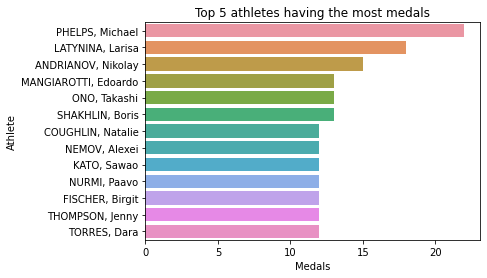

In [25]:
plot = sns.barplot(x='Medal', y='Athlete', data=medals_per_athlete_plot)
plot.set_title("Top 5 athletes having the most medals")
plot.set(xlabel='Medals', ylabel='Athlete')

### 5. Which player has won most number Gold Medals of medals? (Top 5)

Since for our analysis we are only concerned with rows where the athletes have received *Gold* medals, we can filter such rows by the use of boolean filtering technique as shown below

In [26]:
df.loc[df['Medal'] == 'Gold', ['Athlete','Medal']]

,Athlete,Medal
0,"HAJOS, Alfred",Gold
3,"MALOKINIS, Ioannis",Gold
6,"HAJOS, Alfred",Gold
9,"NEUMANN, Paul",Gold
13,"BURKE, Thomas",Gold
...,...,...
31145,"NOROOZI, Omid Haji",Gold
31149,"KIM, Hyeonwoo",Gold
31153,"VLASOV, Roman",Gold
31157,"KHUGAEV, Alan",Gold


To analyse at an athlete level we use `groupby` and take the count of gold medals for each athlete.

In [27]:
df.loc[df['Medal'] == 'Gold', ['Athlete','Medal']].groupby(['Athlete']).count().reset_index()

,Athlete,Medal
0,"AABYE, Edgar",1
1,"AALTONEN, Paavo Johannes",3
2,"AAMODT, Ragnhild",1
3,"AAS, Thomas Valentin",1
4,"ABALMASAU, Aliaksei",1
...,...,...
8282,"ÖRVIG, Thor",1
8283,"ÖSTERVOLD, Henrik",1
8284,"ÖSTERVOLD, Jan Olsen",1
8285,"ÖSTERVOLD, Kristian Olsen",1


Then we sort the athletes by number of gold medals received in descending order as required for our analysis.

In [29]:
gold_per_athlete = df.loc[df['Medal'] == 'Gold', ['Athlete','Medal']].groupby(['Athlete']).count().reset_index().sort_values(by=['Medal'], ascending=False)
gold_per_athlete

,Athlete,Medal
5712,"PHELPS, Michael",18
4186,"LEWIS, Carl",9
5332,"NURMI, Paavo",9
6905,"SPITZ, Mark",9
4066,"LATYNINA, Larisa",9
...,...,...
3029,"HORMANN, Raimund",1
3028,"HORKAI, Gyorgy",1
3026,"HOPP, Karl Heinz",1
3024,"HOOPMAN, Beau",1


Since we need to look at only the top 5 positions, we can filter them out using the `head` function. 

*Note*: Since there are multiple candidates for 2nd, 3rd, 4th and 5th position, I have clubbed multiple athletes in the same rank (similar to ETG leaderboard ranking). We could have also used another criteria (apart from No of medals) to arrive at a single athlete for 2nd, 3rd, 4th and 5th position.

In [30]:
gold_per_athlete_plot = gold_per_athlete.head(29)
gold_per_athlete_plot

,Athlete,Medal
5712,"PHELPS, Michael",18
4186,"LEWIS, Carl",9
5332,"NURMI, Paavo",9
6905,"SPITZ, Mark",9
4066,"LATYNINA, Larisa",9
636,"BIONDI, Matthew",8
7286,"THOMPSON, Jenny",8
1988,"EWRY, Ray",8
3501,"KATO, Sawao",8
2102,"FISCHER, Birgit",8


We have used the `seaborn` library for plotting purposes.

[Text(0.5, 0, 'Gold Medals'), Text(0, 0.5, 'Athlete')]

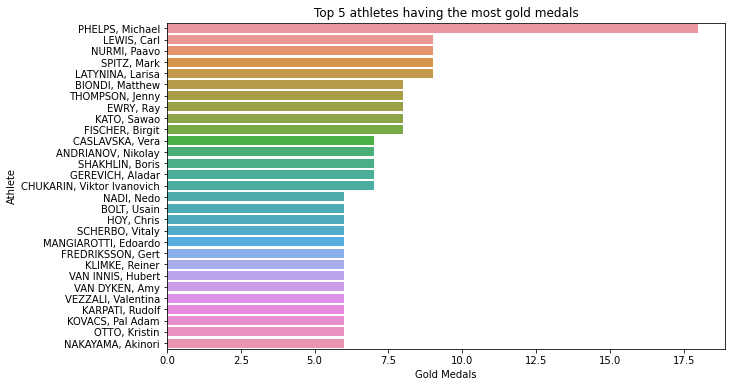

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 6)) 
plot = sns.barplot(x='Medal', y='Athlete', data=gold_per_athlete_plot, ax=ax)
plot.set_title("Top 5 athletes having the most gold medals")
plot.set(xlabel='Gold Medals', ylabel='Athlete')

### 6. In which year India won first Gold Medal in Summer Olympics? 

To find the answer to this question, I have filtered rows where `Medal` is `Gold` and `Country` is `IND` then sorted these by `Year` column in Ascending order and taken the first row to assess the year where India won the first gold medal. 

In [33]:
df.loc[(df['Country'] == 'IND') & (df['Medal'] == 'Gold') , ['Year', 'Country']].sort_values(by=['Year']).head(1)

,Year,Country
5512,1928,IND


#### Answer: 1928

### 7. Which event is most popular in terms of number of players? (Top 5)

Since for our analysis we only require the `Event` and `Athlete` column, we have filtered our dataset below.

In [34]:
df.loc[:, ['Event', 'Athlete']]

,Event,Athlete
0,100M Freestyle,"HAJOS, Alfred"
1,100M Freestyle,"HERSCHMANN, Otto"
2,100M Freestyle For Sailors,"DRIVAS, Dimitrios"
3,100M Freestyle For Sailors,"MALOKINIS, Ioannis"
4,100M Freestyle For Sailors,"CHASAPIS, Spiridon"
...,...,...
31160,Wg 84 KG,"JANIKOWSKI, Damian"
31161,Wg 96 KG,"REZAEI, Ghasem Gholamreza"
31162,Wg 96 KG,"TOTROV, Rustam"
31163,Wg 96 KG,"ALEKSANYAN, Artur"


To analyse at an event level we use `groupby` and take the count of athletes for each event.

In [35]:
df.loc[: , ['Event','Athlete']].groupby(['Event']).count().reset_index()

,Event,Athlete
0,+ 100KG,4
1,+ 100KG (Heavyweight),16
2,+ 100KG (Super Heavyweight),24
3,+ 105KG,9
4,"+ 108KG, Total (Super Heavyweight)",3
...,...,...
661,York Round (100Y - 80Y - 60Y),3
662,Épée Individual,93
663,Épée Team,385
664,"Épée, Amateurs And Masters",3


Then we sort the events by number of athletes in descending order as required for our analysis.

In [36]:
athlete_per_event = df.loc[:, ['Event','Athlete']].groupby(['Event']).count().reset_index().sort_values(by=['Athlete'], ascending=False)
athlete_per_event

,Event,Athlete
477,Football,1497
489,Hockey,1422
614,Team Competition,1147
403,Basketball,1012
483,Handball,973
...,...,...
168,47.63 - 52.16KG (Bantamweight),2
424,Class B Up To 60 Feet,2
379,8M Class C,2
550,"Moving Bird Target, 50M",2


Since we need to look at only the top 5 rows, we can filter them out using the `head` function

In [37]:
athlete_per_event_plot = athlete_per_event.head(5)
athlete_per_event_plot

,Event,Athlete
477,Football,1497
489,Hockey,1422
614,Team Competition,1147
403,Basketball,1012
483,Handball,973


We have used the `seaborn` library for plotting purposes.

[Text(0.5, 0, 'Event'), Text(0, 0.5, 'No of Athletes')]

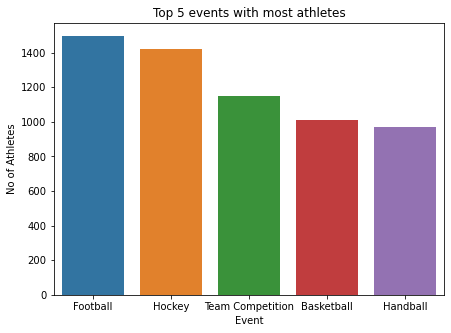

In [38]:
fig, ax = plt.subplots(figsize=(7, 5)) 
plot = sns.barplot(x='Event', y='Athlete', data=athlete_per_event_plot, ax=ax)
plot.set_title("Top 5 events with most athletes")
plot.set(xlabel='Event', ylabel='No of Athletes')

### 8. Which sport is having most female Gold Medalists? (Top 5)

Since for our analysis we are only concerned with rows where there are *Gold* medals received by female athletes, we can filter such rows by the use of boolean filtering technique as shown below

In [39]:
df.loc[(df['Medal'] == 'Gold') & (df['Gender'] == 'Women'), ['Sport','Medal']]

,Sport,Medal
417,Golf,Gold
641,Tennis,Gold
649,Tennis,Gold
710,Archery,Gold
713,Archery,Gold
...,...,...
31081,Weightlifting,Gold
31097,Wrestling,Gold
31105,Wrestling,Gold
31113,Wrestling,Gold


To analyse at a sport level we use `groupby` and take the count of gold medals for each sport.

In [40]:
df.loc[(df['Medal'] == 'Gold') & (df['Gender'] == 'Women'), ['Sport','Medal']].groupby(['Sport']).count().reset_index()

,Sport,Medal
0,Aquatics,589
1,Archery,39
2,Athletics,389
3,Badminton,23
4,Basketball,120
5,Boxing,3
6,Canoe,9
7,Canoe / Kayak,76
8,Cycling,45
9,Equestrian,51


Then we sort the sports by number of gold medals received in descending order as required for our analysis.

In [41]:
female_gold_per_sport = df.loc[(df['Medal'] == 'Gold') & (df['Gender'] == 'Women'), ['Sport','Medal']].groupby(['Sport']).count().reset_index().sort_values(by=['Medal'], ascending=False)
female_gold_per_sport

,Sport,Medal
0,Aquatics,589
2,Athletics,389
13,Gymnastics,268
18,Rowing,217
27,Volleyball,166
15,Hockey,144
14,Handball,142
4,Basketball,120
10,Fencing,108
11,Football,86


Since we need to look at only the top 5 rows, we can filter them out using the `head` function

In [42]:
female_gold_per_sport_plot = female_gold_per_sport.head()
female_gold_per_sport_plot

,Sport,Medal
0,Aquatics,589
2,Athletics,389
13,Gymnastics,268
18,Rowing,217
27,Volleyball,166


We have used the `seaborn` library for plotting purposes.

[Text(0.5, 0, 'Gold Medals'), Text(0, 0.5, 'Sport')]

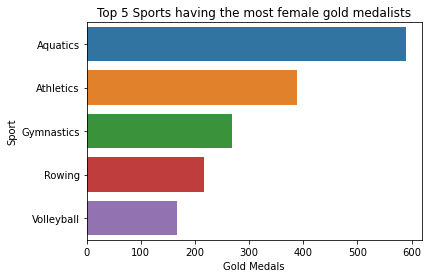

In [43]:
plot = sns.barplot(x='Medal', y='Sport', data=female_gold_per_sport_plot)
plot.set_title("Top 5 Sports having the most female gold medalists")
plot.set(xlabel='Gold Medals', ylabel='Sport')